In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
## Custom imports
from matplotlib.cm import jet
from math import ceil, pi
from scipy.stats import poisson, norm, binom
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Rectangle

In [3]:
## Adding a button to hide the Python source code
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10792: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.ajmarkwick.net/">Dr. Andrew Markwick</a> - Twitter <a href="https://twitter.com/AndrewMarkwick">@AndrewMarkwick</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Prof. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

## Problem Sheet 9a

### Problem 1: Probabilities

#### Problem 1.1

In a lab experiment 300 students measure the weight of the same object. On average, they measure a weight of 1 kg. The variance of their measurements is $10^{-4}$ kg$^2$. 
- What is the error on the mean derived from the results of all students?
- The measurement uncertainty of the scales used by the students is stated as 5 g. What do you conclude from this?
- The lowest value measured by any of the students is 968 g. Does this agree with your expectations from the cohort of measurements?

#### Problem 1.2

An experiment to count muons reaching the earth's surface from cosmic rays is conducted by 120 students. The average expected count rate is 1 per cm$^2$ and per minute. The students start their experiment at 15:20 on a Friday and end the count at 10:00 on the following Monday. Their detectors have a survace area of 0.5 cm by 5.0 cm.
- What average count and sample standard deviation do you expect?
- How many of the students would you expect to have a count of 200 or more above the average?

### Solution to Problem 1

#### Solution 1.1

- The error on the mean is the sample standard deviation divided by the square-root of the number of elements in the sample. The sample standard deviation is the square-root of the variance, hence the error is: $\sigma=\sqrt{V}/\sqrt{N}=10^{-2}~{\rm kg}/\sqrt{300}=0.577~{\rm g}$.
- The sample standard deviation, which is $10~{\rm g}$ according to the previous answer, should correspond to the uncertainty of individual measurements. The fact that the uncertainty is stated as being half of that value indicates that the stated uncertainty is too small.
- Assuming a Gaussian distribution, we can expect $99.7\%$ to lie within $\pm3\sigma$ of the distribution, which corresponds to 299 of the 300 measurements giving results in the range $[970~{\rm g},1030~{\rm g}]$. While we do not know the distribution of results greater than the mean, having the lowest result just outside the $3\sigma$ range seems credible.

#### Solution 1.2

- 4000 minutes and 2.5 cm$^2$ mean the expected count is 10,000. The standard deviation is therefore $\sigma=\sqrt{N}=100$.
- A count of 200 above the mean corresponds to 2 standard deviations. We would expect $5\%$ to lie outside two standard deviations either below or above the mean, so $2.5\%$ should have a count of 200 or more above the average. This corresponds to 3 students.

### Problem 2: Confidence belts

#### Problem 2.1
Produce a $95\%$ central interval confidence belt for a Gaussian distribution describing the mass measurement from a set of scales with a dish in which the objects to be measured are placed. Assume that the measured value includes the mass of the dish of 20 g (known exactly) with the true value corresponding to the mass of the content of the dish. Assume further that the measurement uncertainty has a constant component of 1 g and a variable component of $0.05\times m$, where $m$ is the true mass (these components add linearly).
- Sketch the corresponding confidence belt.
- Determine the $95\%$ intervals for the true mass based on assumed measured masses of 27 g and 54 g.

### Solution to Problem 2

#### Solution 2.1

- The horizontal interval boundaries for a true value of $y$ are given by $x_\pm=d+y\pm{}s(c+my)$, for the dish weight, $d=20~{\rm g}$, the Gaussian scale factor, $s=1.96$, the constant error component, $c=1~{\rm g}$, and the variable error component factor, $m=0.05$.

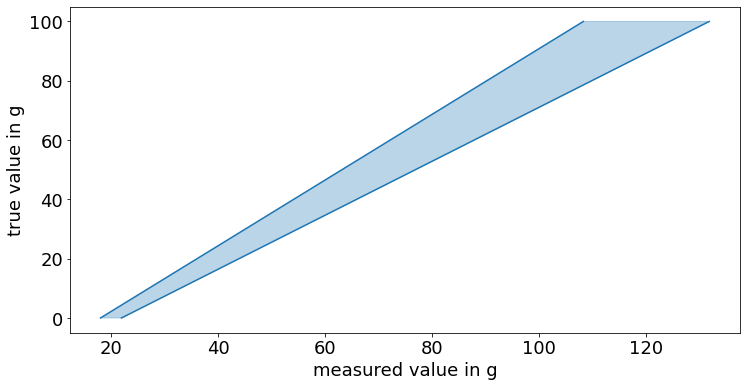

In [4]:
import matplotlib.pyplot as plt

# Define values
d = 20
c = 1
m = 0.05
s = 1.96
y1 = 0
y2 = 100

# Calculate confidence band boundaries
x1 = d+y1+s*(c+m*y1) 
x2 = d+y2+s*(c+m*y2)
x3 = d+y1-s*(c+m*y1)
x4 = d+y2-s*(c+m*y2)

# Plot confidence belt
fig,ax = plt.subplots(figsize=(12,6))
ax.plot([x1,x2],[y1,y2], '-', label='Binomial PMF', color='tab:blue')
ax.plot([x3,x4],[y1,y2], '-', label='Binomial PMF', color='tab:blue')
ax.fill([x3,x1,x2,x4],[y1,y1,y2,y2], color='tab:blue', alpha=0.3)

# Font sizes
ax.set_xlabel('measured value in g', fontsize=18)
ax.set_ylabel('true value in g', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

- Solving the above equations for $y$ gives the true intervals, and for a measurement of $27~{\rm g}$ the range is $4.6$ to $9.9~{\rm g}$, for a measurement of $54~{\rm g}$ the range is $29.2$ to $39.9~{\rm g}$.

For a measurement of 27 the range is 4.590163934426229 9.933481152993348
For a measurement of 54 the range is 29.180327868852455 39.866962305986696


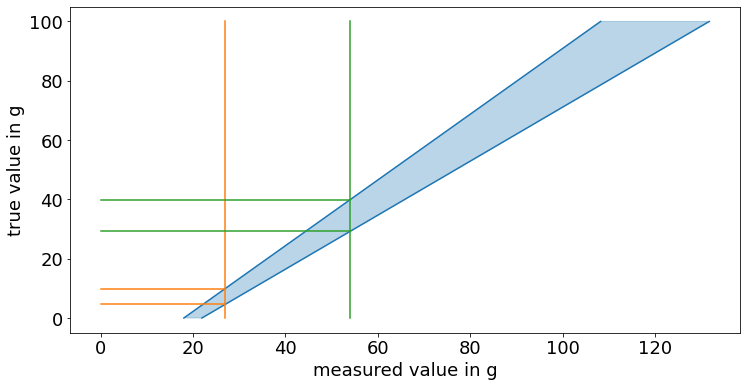

In [5]:
import matplotlib.pyplot as plt

# Define values
d = 20
c = 1
m = 0.05
s = 1.96
y1 = 0
y2 = 100

# Calculate confidence band boundaries
x1 = d+y1+s*(c+m*y1) 
x2 = d+y2+s*(c+m*y2)
x3 = d+y1-s*(c+m*y1)
x4 = d+y2-s*(c+m*y2)

# Measured values
meas1 = 27
meas2 = 54

# Calculate true value ranges from measured values by inverting equations above
# x = d+s*c + y * (1+s*m) ==> y = (x-d-s*c)/(1+s*m) with [s --> -s] for ymin/ymax
ymin1 = (meas1-d-s*c)/(1+s*m)
ymax1 = (meas1-d+s*c)/(1-s*m)
ymin2 = (meas2-d-s*c)/(1+s*m)
ymax2 = (meas2-d+s*c)/(1-s*m)

# Print results
print('For a measurement of',meas1,'the range is',ymin1,ymax1)
print('For a measurement of',meas2,'the range is',ymin2,ymax2)

# Plot confidence belt
fig,ax = plt.subplots(figsize=(12,6))
ax.plot([x1,x2],[y1,y2], '-', label='Binomial PMF', color='tab:blue')
ax.plot([x3,x4],[y1,y2], '-', label='Binomial PMF', color='tab:blue')
ax.fill([x3,x1,x2,x4],[y1,y1,y2,y2], color='tab:blue', alpha=0.3)

# Plot first measurement
ax.plot([meas1,meas1],[y1,y2],color='tab:orange')
ax.plot([0,meas1],[ymin1,ymin1],color='tab:orange')
ax.plot([0,meas1],[ymax1,ymax1],color='tab:orange')

# Plot second measurement
ax.plot([meas2,meas2],[y1,y2],color='tab:green')
ax.plot([0,meas2],[ymin2,ymin2],color='tab:green')
ax.plot([0,meas2],[ymax2,ymax2],color='tab:green')

# Font sizes
ax.set_xlabel('measured value in g', fontsize=18)
ax.set_ylabel('true value in g', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)


<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>